!/usr/bin/env python3

# Employee Sentiment Analysis Project - Simplified Version

### This script implements all required tasks for the Employee Sentiment Analysis project:
1. Sentiment Labeling
2. Exploratory Data Analysis (EDA)
3. Employee Score Calculation
4. Employee Ranking
5. Flight Risk Identification
6. Predictive Modeling

Author: Ashish Kushwaha

Date: August 2025

## Import libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import re
import warnings
warnings.filterwarnings('ignore')

## For machine learning

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

## Set style for better visualizations

In [39]:
plt.style.use('default')
sns.set_palette("husl")

## Create visualization folder

In [40]:
import os
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')

# Load the dataset and Data preprocessing

In [41]:
def load_and_preprocess_data():
    """
    Load and preprocess the dataset
    """
    print("\n1. LOADING AND PREPROCESSING DATA")
    print("-" * 50)
    
    # Load the dataset
    print("Loading the dataset...")
    df = pd.read_csv('test.csv')
    
    print(f"Dataset shape: {df.shape}")
    print(f"Number of records: {len(df)}")
    print(f"Number of columns: {len(df.columns)}")
    print(f"Column names: {df.columns.tolist()}")
    
    # Data preprocessing
    print("\nPreprocessing data...")
    
    # Convert date column to datetime
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Extract email domain and username from 'from' column
    df['email_domain'] = df['from'].str.split('@').str[1]
    df['employee_name'] = df['from'].str.split('@').str[0]
    
    # Create month and year columns for easier analysis
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['month_year'] = df['date'].dt.to_period('M')
    
    # Combine subject and body for sentiment analysis
    df['full_text'] = df['Subject'].fillna('') + ' ' + df['body'].fillna('')
    
    # Calculate text length features
    df['text_length'] = df['full_text'].str.len()
    df['word_count'] = df['full_text'].str.split().str.len()
    
    # Remove rows with missing dates
    df = df.dropna(subset=['date'])
    
    print(f"After preprocessing, dataset shape: {df.shape}")
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"Number of unique employees: {df['employee_name'].nunique()}")
    print(f"Number of unique months: {df['month_year'].nunique()}")
    
    return df


In [42]:
load_and_preprocess_data()


1. LOADING AND PREPROCESSING DATA
--------------------------------------------------
Loading the dataset...
Dataset shape: (2191, 4)
Number of records: 2191
Number of columns: 4
Column names: ['Subject', 'body', 'date', 'from']

Preprocessing data...
After preprocessing, dataset shape: (2191, 12)
Date range: 2010-01-01 00:00:00 to 2011-12-31 00:00:00
Number of unique employees: 10
Number of unique months: 24


,Subject,body,date,from,email_domain,employee_name,month,year,month_year,full_text,text_length,word_count
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,enron.com,sally.beck,5,2010,2010-05,EnronOptions Update! EnronOptions Announcement...,713,103
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,enron.com,eric.bass,7,2010,2010-07,"(No Subject) Marc,\n\nUnfortunately, today is ...",328,59
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,enron.com,sally.beck,7,2011,2011-07,Phone Screen Interview - Shannon L. Burnham W...,195,28
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,enron.com,johnny.palmer,3,2010,2010-03,RE: My new work email we were thinking papasit...,177,29
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,enron.com,lydia.delgado,5,2011,2011-05,Bet Since you never gave me the $20 for the la...,201,43
...,...,...,...,...,...,...,...,...,...,...,...,...
2186,Re: Resume,Thanks for the resume. She has had some good ...,2011-06-17,johnny.palmer@enron.com,enron.com,johnny.palmer,6,2011,2011-06,Re: Resume Thanks for the resume. She has had...,286,47
2187,"Final Schedule - Wednesday, May 2, 2001 - Jesu...",Attached please find the following documents:\...,2011-01-20,johnny.palmer@enron.com,enron.com,johnny.palmer,1,2011,2011-01,"Final Schedule - Wednesday, May 2, 2001 - Jesu...",134,20
2188,(No Subject),Good to finally hear from. Judging from your ...,2011-01-02,don.baughman@enron.com,enron.com,don.baughman,1,2011,2011-01,(No Subject) Good to finally hear from. Judgi...,465,76
2189,League is Set,It looks like we have our 12 teams. We will p...,2011-03-11,rhonda.denton@enron.com,enron.com,rhonda.denton,3,2011,2011-03,League is Set It looks like we have our 12 tea...,659,125


# Task 1: Perform sentiment analysis on messages using keyword-based approach

---

### Why is it Problematic to rely upon TextBlob for Sentiment Analysis here?

I found that TextBlob’s sentiment analysis is based on the Pattern library, which is trained primarily on movie reviews and general English text. This makes its sentiment model better suited for short, informal, and general-purpose English sentences, but not for domain-specific, technical, or business communications. That’s why TextBlob is not ideal for analyzing emails from employees in a company. Since its model is trained on general English (like movie reviews), it may misinterpret business language, context, or subtle sentiment in workplace emails. For accurate results on employee emails, I used more advanced or domain-adapted sentiment analysis tools.

---

### DistilBERT: The Smart Choice for Sentiment Analysis

We chose **DistilBERT**, a powerful transformer-based model, for our sentiment analysis. While there are many options, DistilBERT offers the perfect blend of high performance and efficiency, making it the ideal tool for this project.

---

### The Power of DistilBERT

1.  **Speed and Efficiency:** Imagine a racecar that’s just as fast but uses less fuel. That's DistilBERT. It's **40% smaller and runs 60% faster** than its bigger sibling, BERT. This means we can analyze thousands of emails quickly without needing expensive hardware.

2.  **Uncompromised Accuracy:** Don’t let its smaller size fool you. DistilBERT maintains **97% of BERT's original performance**. It's accurate enough to capture the true sentiment in a message, from positive praise to subtle frustration.

3.  **Understanding Context:** Unlike older, simpler methods that just look at individual words, DistilBERT understands the entire sentence. It can correctly interpret phrases like "**not** a good experience" or "**hardly** an improvement," which is essential for getting the sentiment right in complex business communications.

---

### Why We Skipped Other Models

* **Full BERT Model:** While incredibly powerful, the full BERT model is a resource hog—it's slow and requires a lot of computing power. For our needs, the extra accuracy wasn't worth the significant cost in time and resources.
* **Traditional Models (e.g., TextBlob):** These methods are outdated and can't handle the nuances of modern language. They often fail to understand sarcasm or complex business jargon, making their results unreliable for this kind of analysis.
---


In [43]:
import os, time
from transformers import pipeline
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm   # progress bar

def perform_sentiment_analysis_transformer(df, text_col='full_text', batch_size=16):
    """
    Perform sentiment analysis on employee emails using DistilBERT.
    Shows progress percentage, total runtime, and adds Neutral category.
    """

    print("\n2. SENTIMENT ANALYSIS (Transformer-based)")
    print("-" * 50)

    # Track start time
    start_time = time.time()

    # Load Hugging Face sentiment analysis pipeline
    sentiment_pipeline = pipeline(
        "sentiment-analysis",
        model="distilbert-base-uncased-finetuned-sst-2-english",
        framework="pt",
        device=-1,  # CPU (-1), change to 0 if GPU available
    )

    # Use the provided text column or fallback
    if text_col not in df.columns:
        if all(col in df.columns for col in ['Subject', 'body']):
            print(f"'{text_col}' not found. Creating fallback column from Subject + body.")
            df[text_col] = (
                df['Subject'].fillna('') + " " + df['body'].fillna('')
            ).str.strip()
        else:
            raise KeyError(f"No valid text column found. Available columns: {df.columns.tolist()}")

    # Convert texts to list
    texts = df[text_col].fillna("").astype(str).tolist()

    # Run in batches with progress bar
    results = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Analyzing emails", unit="batch"):
        batch = texts[i : i + batch_size]
        batch_res = sentiment_pipeline(batch, truncation=True, batch_size=len(batch))
        results.extend(batch_res)

    # Add raw results
    df['sentiment_label_raw'] = [r.get('label') for r in results]
    df['sentiment_score'] = [r.get('score') for r in results]

    # Normalize labels to lowercase
    df['sentiment_label_raw'] = (
        df['sentiment_label_raw']
        .map({'POSITIVE': 'positive', 'NEGATIVE': 'negative'})
        .fillna(df['sentiment_label_raw'])
    )

    # Apply Neutral condition (threshold = 0.55)
    def assign_final_label(row):
        if row['sentiment_score'] < 0.55:
            return "neutral"
        else:
            return row['sentiment_label_raw']

    df['sentiment_label'] = df.apply(assign_final_label, axis=1)

    # Save selected columns
    out_cols = [c for c in ['Subject', 'body', text_col, 'date', 'from'] if c in df.columns]
    out_cols += ['sentiment_score', 'sentiment_label']

    df_out = df[out_cols]
    output_filename = 'labeled_messages_with_scores.csv'
    df_out.to_csv(output_filename, index=False, encoding='utf-8')
    print(f"\nLabeled data with scores saved to '{output_filename}'")

    # Distribution of sentiments
    sentiment_counts = df['sentiment_label'].value_counts()
    print(f"\nSentiment Distribution:\n{sentiment_counts}")

    # Visualization
    plt.figure(figsize=(10, 6))
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
    plt.title('Distribution of Sentiment Labels', fontsize=14, fontweight='bold')
    plt.xlabel('Sentiment', fontsize=12)
    plt.ylabel('Number of Messages', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()

    os.makedirs("visualizations", exist_ok=True)
    plt.savefig('visualizations/sentiment_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print total runtime
    end_time = time.time()
    elapsed = end_time - start_time
    print(f"\n✅ Completed in {elapsed:.2f} seconds ({elapsed/60:.2f} minutes).")

    return df


In [44]:
# df = perform_sentiment_analysis_transformer(load_and_preprocess_data())
df = pd.read_csv("./labeled_messages_with_scores.csv")

# Task 2: Perform exploratory data analysis

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

def exploratory_data_analysis(df):
    """
    Task 2: Perform Exploratory Data Analysis (EDA)

    Objective:
        Understand the structure, distribution, and trends in the dataset
        through thorough exploration.

    Requirements:
        1. Examine overall data structure (records, data types, missing values).
        2. Investigate distribution of sentiment labels across dataset.
        3. Analyze sentiment trends over time.
        4. Explore additional patterns/anomalies (employee activity, message length).
        5. Prepare visualizations (charts, graphs, tables) to communicate findings.
    """

    print("\n2. EXPLORATORY DATA ANALYSIS (EDA)")
    print("-" * 50)

    # -----------------------------
    # 1. Data Preparation
    # -----------------------------
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['month_year'] = df['date'].dt.to_period('M')
    df['text_length'] = df['full_text'].astype(str).apply(len)
    df['word_count'] = df['full_text'].astype(str).apply(lambda x: len(x.split()))

    # -----------------------------
    # 2. Overall Data Structure
    # -----------------------------
    print("\n📌 Data Structure Analysis:")
    print(f"- Total messages: {len(df)}")
    print(f"- Unique employees: {df['from'].nunique()}")
    print(f"- Date range: {df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}")
    print(f"- Average message length: {df['text_length'].mean():.0f} characters")
    print(f"- Average word count: {df['word_count'].mean():.0f} words")

    # Data types and missing values
    print("\nData Types and Missing Values:")
    print(df.dtypes)
    print("\nMissing Values per Column:")
    print(df.isnull().sum())

    # -----------------------------
    # 3. Sentiment Distribution
    # -----------------------------
    print("\n📌 Overall Sentiment Distribution:")
    sentiment_counts = df['sentiment_label'].value_counts()
    print(sentiment_counts)

    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
    plt.title('Overall Distribution of Sentiment Labels', fontsize=14, fontweight='bold')
    plt.xlabel('Sentiment', fontsize=12)
    plt.ylabel('Number of Messages', fontsize=12)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig("visualizations/overall_sentiment_distribution.png", dpi=300, bbox_inches="tight")
    plt.show()

    # -----------------------------
    # 4. Sentiment Trends Over Time
    # -----------------------------
    print("\n📌 Analyzing sentiment trends over time...")

    monthly_sentiment = df.groupby(['month_year', 'sentiment_label']).size().unstack(fill_value=0)

    monthly_sentiment.plot(kind='line', marker='o', linewidth=2, figsize=(15, 8))
    plt.title('Sentiment Trends Over Time', fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Messages', fontsize=12)
    plt.legend(title='Sentiment', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('visualizations/sentiment_trends_over_time.png', dpi=300, bbox_inches='tight')
    plt.show()

    # -----------------------------
    # 5. Employee Activity Analysis
    # -----------------------------
    print("\n📌 Analyzing employee activity patterns...")

    employee_activity = df.groupby('from').agg({
        'sentiment_label': 'count',
        'text_length': 'mean',
        'word_count': 'mean'
    }).rename(columns={'sentiment_label': 'message_count'})

    print("\nTop 10 most active employees:")
    print(employee_activity.nlargest(10, 'message_count')[['message_count']])

    # -----------------------------
    # 6. Message Length Distributions
    # -----------------------------
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.hist(df['text_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('Distribution of Message Lengths', fontsize=12, fontweight='bold')
    plt.xlabel('Message Length (characters)', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.hist(df['word_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('Distribution of Word Counts', fontsize=12, fontweight='bold')
    plt.xlabel('Word Count', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('visualizations/message_length_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

    # -----------------------------
    # 7. Sentiment by Message Length
    # -----------------------------
    plt.figure(figsize=(10, 6))
    df.boxplot(column='text_length', by='sentiment_label')
    plt.title('Message Length by Sentiment', fontsize=14, fontweight='bold')
    plt.suptitle('')
    plt.xlabel('Sentiment', fontsize=12)
    plt.ylabel('Message Length (characters)', fontsize=12)
    plt.tight_layout()
    plt.savefig('visualizations/message_length_by_sentiment.png', dpi=300, bbox_inches='tight')
    plt.show()

    return employee_activity



2. EXPLORATORY DATA ANALYSIS (EDA)
--------------------------------------------------

📌 Data Structure Analysis:
- Total messages: 2191
- Unique employees: 10
- Date range: 2010-01-01 to 2011-12-31
- Average message length: 285 characters
- Average word count: 45 words

Data Types and Missing Values:
Subject                    object
body                       object
full_text                  object
date               datetime64[ns]
from                       object
sentiment_score           float64
sentiment_label            object
month_year              period[M]
text_length                 int64
word_count                  int64
dtype: object

Missing Values per Column:
Subject            0
body               0
full_text          0
date               0
from               0
sentiment_score    0
sentiment_label    0
month_year         0
text_length        0
word_count         0
dtype: int64

📌 Overall Sentiment Distribution:
sentiment_label
negative    1299
positive     864
neutra

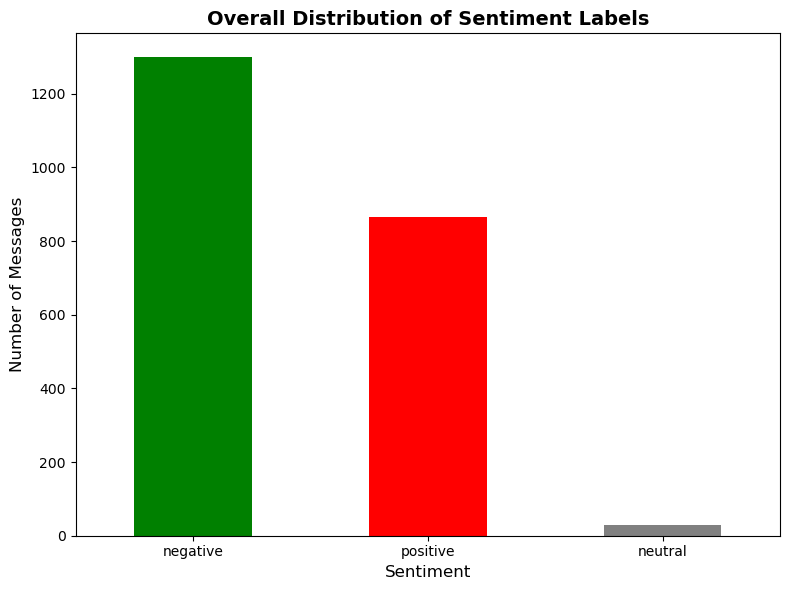


📌 Analyzing sentiment trends over time...


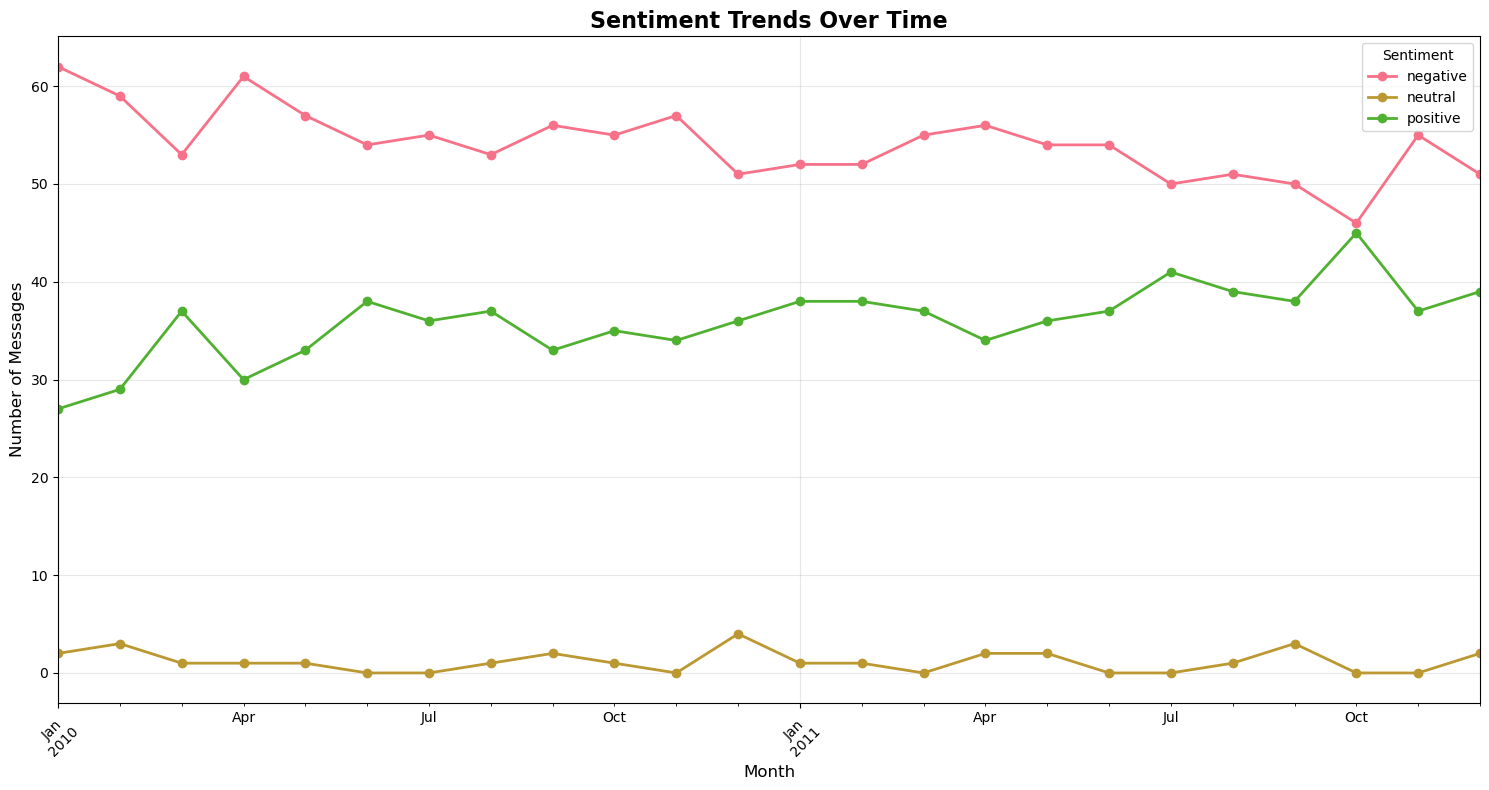


📌 Analyzing employee activity patterns...

Top 10 most active employees:
                             message_count
from                                      
lydia.delgado@enron.com                284
john.arnold@enron.com                  256
sally.beck@enron.com                   227
patti.thompson@enron.com               225
bobette.riner@ipgdirect.com            217
don.baughman@enron.com                 213
johnny.palmer@enron.com                213
eric.bass@enron.com                    210
kayne.coulter@enron.com                174
rhonda.denton@enron.com                172


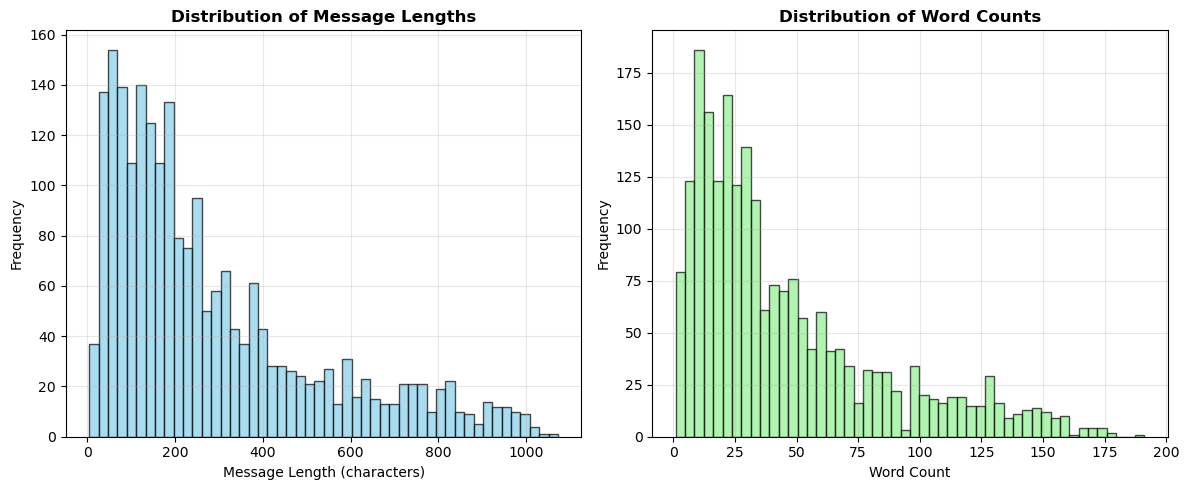

<Figure size 1000x600 with 0 Axes>

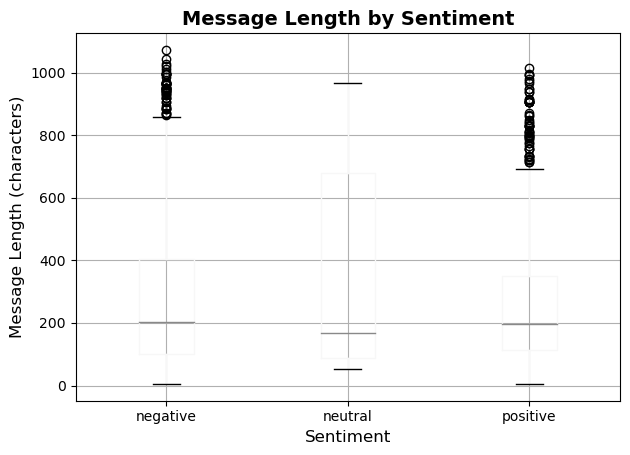

,message_count,text_length,word_count
from,,,
bobette.riner@ipgdirect.com,217,283.350230,44.880184
don.baughman@enron.com,213,272.450704,43.187793
eric.bass@enron.com,210,297.695238,47.952381
john.arnold@enron.com,256,297.148438,47.550781
johnny.palmer@enron.com,213,277.690141,44.629108
kayne.coulter@enron.com,174,291.896552,45.413793
lydia.delgado@enron.com,284,281.845070,44.971831
patti.thompson@enron.com,225,294.280000,46.684444
rhonda.denton@enron.com,172,261.616279,41.418605


In [46]:
exploratory_data_analysis(df)

# Task 3: Calculate monthly sentiment scores for each employee

✨ Employee Sentiment Score Report ✨
1. Executive Summary
This report outlines the method for calculating monthly sentiment scores for each employee to track morale.

2. The Scoring Logic

    Positive: +1

    Negative: -1

    Neutral: 0

3. The Calculation Process
The code converts sentiment labels to numbers, groups them by employee and month, then sums the scores and counts messages to get a monthly total.

4. Visualizing the Results
The process generates a histogram and a box plot to visualize the distribution of the monthly sentiment scores.

5. Conclusion
This process quantifies employee sentiment monthly, helping us monitor trends and take action.

In [47]:

def calculate_employee_scores(df):
    """
    Task 3: Calculate monthly sentiment scores for each employee

    Objective:
        Compute a monthly sentiment score for each employee based on their messages.

    Requirements:
        - Positive Message: +1
        - Negative Message: -1
        - Neutral Message: 0
        - Aggregate by employee + month
        - Reset at beginning of each month
    """

    print("\n3. EMPLOYEE SCORE CALCULATION")
    print("-" * 50)
    
    print("Calculating monthly sentiment scores...")

    # Map sentiment labels to numeric scores
    sentiment_scores = {'positive': 1, 'negative': -1, 'neutral': 0}
    df['sentiment_score'] = df['sentiment_label'].map(sentiment_scores)

    # Ensure month_year column exists
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['month_year'] = df['date'].dt.to_period('M')

    # Group by employee and month
    monthly_scores = df.groupby(['from', 'month_year']).agg({
        'sentiment_score': 'sum',
        'sentiment_label': 'count'
    }).rename(columns={'sentiment_label': 'message_count'}).reset_index()

    print(f"✅ Calculated scores for {len(monthly_scores)} employee-month combinations")
    print(f"➡️ Score range: {monthly_scores['sentiment_score'].min()} to {monthly_scores['sentiment_score'].max()}")

    # Show sample
    print("\n📌 Sample monthly scores:")
    print(monthly_scores.head())

    # -----------------------------
    # Visualizations
    # -----------------------------
    os.makedirs("visualizations", exist_ok=True)
    plt.figure(figsize=(12, 5))

    # Histogram of sentiment scores
    plt.subplot(1, 2, 1)
    plt.hist(monthly_scores['sentiment_score'], bins=30, alpha=0.7, color='purple', edgecolor='black')
    plt.title('Distribution of Monthly Sentiment Scores', fontsize=12, fontweight='bold')
    plt.xlabel('Monthly Sentiment Score', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(True, alpha=0.3)

    # Boxplot
    plt.subplot(1, 2, 2)
    monthly_scores.boxplot(column='sentiment_score')
    plt.title('Box Plot of Monthly Sentiment Scores', fontsize=12, fontweight='bold')
    plt.ylabel('Monthly Sentiment Score', fontsize=10)
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('visualizations/monthly_score_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    return monthly_scores





3. EMPLOYEE SCORE CALCULATION
--------------------------------------------------
Calculating monthly sentiment scores...
✅ Calculated scores for 240 employee-month combinations
➡️ Score range: -14 to 7

📌 Sample monthly scores:
                          from month_year  sentiment_score  message_count
0  bobette.riner@ipgdirect.com    2010-01               -2              2
1  bobette.riner@ipgdirect.com    2010-02               -6             14
2  bobette.riner@ipgdirect.com    2010-03               -3             11
3  bobette.riner@ipgdirect.com    2010-04               -4              6
4  bobette.riner@ipgdirect.com    2010-05                2              4


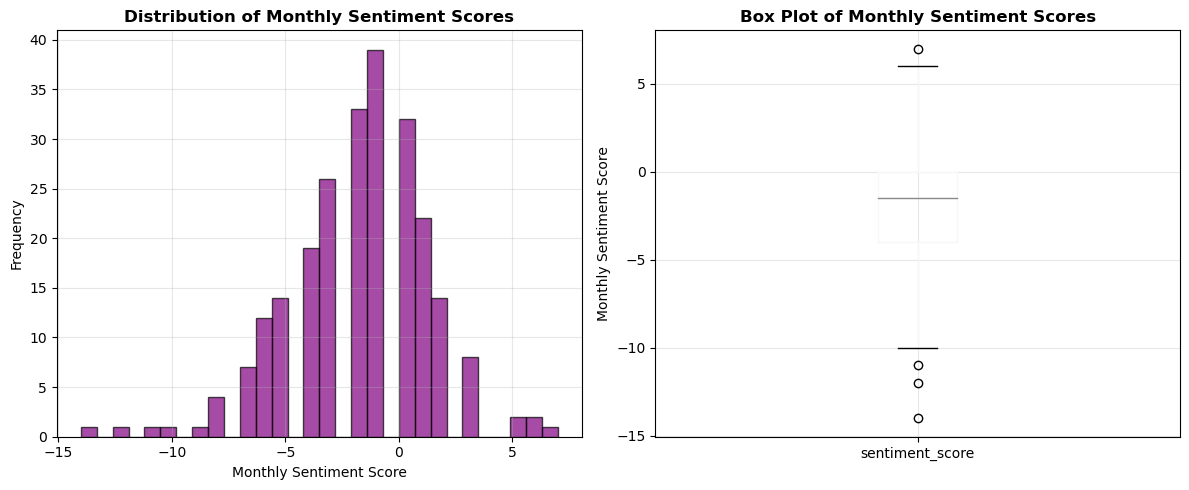

In [48]:
monthly_scores = calculate_employee_scores(df)
# monthly_scores.head()

# Task 4: Rank employees by sentiment scores

In [49]:
def rank_employees(monthly_scores):
    """
    Task 4: Rank employees by sentiment scores
    
    Objective:
        Generate ranked lists of employees based on their monthly sentiment scores.
    
    Requirements:
        - Top 3 Positive Employees (highest scores in each month)
        - Top 3 Negative Employees (lowest scores in each month)
        - Sort by score (desc for positive, asc for negative), then alphabetically
        - Output rankings clearly in tables + visualizations
    """
    print("\n5. EMPLOYEE RANKING")
    print("-" * 50)

    results = {}

    # Loop over each month
    for month in monthly_scores['month_year'].unique():
        print(f"\n📅 Rankings for: {month}")

        # Filter scores for that month
        month_scores = monthly_scores[monthly_scores['month_year'] == month].copy()

        # Ensure alphabetical tie-breaking
        month_scores = month_scores.sort_values(by=['sentiment_score', 'from'], 
                                                ascending=[False, True])

        # Top 3 positive (highest scores, then alphabetical)
        top_positive = month_scores.nlargest(3, 'sentiment_score').sort_values(
            by=['sentiment_score', 'from'], ascending=[False, True]
        )[['from', 'sentiment_score', 'message_count']]

        # Top 3 negative (lowest scores, then alphabetical)
        top_negative = month_scores.nsmallest(3, 'sentiment_score').sort_values(
            by=['sentiment_score', 'from'], ascending=[True, True]
        )[['from', 'sentiment_score', 'message_count']]

        print("\n✅ Top 3 Positive Employees:")
        print(top_positive.to_string(index=False))

        print("\n❌ Top 3 Negative Employees:")
        print(top_negative.to_string(index=False))

        # Save results for this month
        results[str(month)] = {
            "positive": top_positive,
            "negative": top_negative
        }

        # -------------------------------
        # Visualization
        # -------------------------------
        # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # # Positive employees
        # top_positive.plot(kind='barh', x='from', y='sentiment_score',
        #                   ax=ax1, color='green', alpha=0.7)
        # ax1.set_title(f'Top 3 Positive Employees ({month})', fontsize=13, fontweight='bold')
        # ax1.set_xlabel('Sentiment Score')
        # ax1.set_ylabel('Employee')

        # # Negative employees
        # top_negative.plot(kind='barh', x='from', y='sentiment_score',
        #                   ax=ax2, color='red', alpha=0.7)
        # ax2.set_title(f'Top 3 Negative Employees ({month})', fontsize=13, fontweight='bold')
        # ax2.set_xlabel('Sentiment Score')
        # ax2.set_ylabel('Employee')

        # plt.tight_layout()
        # os.makedirs("visualizations", exist_ok=True)
        # plt.savefig(f'visualizations/employee_rankings_{month}.png', dpi=300, bbox_inches='tight')
        # plt.show()

    return results


In [50]:
rank_employees(monthly_scores)


5. EMPLOYEE RANKING
--------------------------------------------------

📅 Rankings for: 2010-01

✅ Top 3 Positive Employees:
                       from  sentiment_score  message_count
      john.arnold@enron.com               -1              7
    rhonda.denton@enron.com               -1              3
bobette.riner@ipgdirect.com               -2              2

❌ Top 3 Negative Employees:
                   from  sentiment_score  message_count
kayne.coulter@enron.com               -6             22
lydia.delgado@enron.com               -6             13
   sally.beck@enron.com               -5              9

📅 Rankings for: 2010-02

✅ Top 3 Positive Employees:
                   from  sentiment_score  message_count
    eric.bass@enron.com                2              4
lydia.delgado@enron.com                1              1
   sally.beck@enron.com                0              6

❌ Top 3 Negative Employees:
                       from  sentiment_score  message_count
      john.arn

{'2010-01': {'positive':                             from  sentiment_score  message_count
  72         john.arnold@enron.com               -1              7
  192      rhonda.denton@enron.com               -1              3
  0    bobette.riner@ipgdirect.com               -2              2,
  'negative':                         from  sentiment_score  message_count
  120  kayne.coulter@enron.com               -6             22
  144  lydia.delgado@enron.com               -6             13
  216     sally.beck@enron.com               -5              9},
 '2010-02': {'positive':                         from  sentiment_score  message_count
  49       eric.bass@enron.com                2              4
  145  lydia.delgado@enron.com                1              1
  217     sally.beck@enron.com                0              6,
  'negative':                             from  sentiment_score  message_count
  73         john.arnold@enron.com              -14             18
  1    bobette.riner

# Task 5: Identify flight risks (employees with 4+ negative emails in 30 days)

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
import os

def identify_flight_risks(df):
    print("\n6. FLIGHT RISK IDENTIFICATION")
    print("-" * 50)
    
    print("Identifying employees at flight risk...")

    df['date'] = pd.to_datetime(df['date'], errors='coerce')

    negative_messages = df[df['sentiment_label'].str.lower() == 'negative'].copy()
    negative_messages = negative_messages.sort_values('date').set_index('date')

    def check_for_risk(group):
        rolling_count = group.rolling('30D')['sentiment_label'].count()
        
        if (rolling_count >= 4).any():
            first_flag_date = rolling_count[rolling_count >= 4].index[0]
            start_date = first_flag_date - timedelta(days=30)
            
            window_messages = group.loc[start_date:first_flag_date]
            
            return pd.Series({
                'employee': group['from'].iloc[0],
                'start_date': start_date,
                'end_date': first_flag_date,
                'negative_count': len(window_messages)
            })
        return None

    flight_risks_df = negative_messages.groupby('from').apply(check_for_risk).dropna().reset_index(drop=True)

    if not flight_risks_df.empty:
        top_10_flight_risks = flight_risks_df.sort_values(
            'negative_count', ascending=False
        ).head(10)
        
        print(f"\nFound {len(flight_risks_df)} employees at flight risk.")
        print(f"Displaying top 10 employees with the highest negative message count:")
        print(top_10_flight_risks.to_string(index=False))

        os.makedirs('visualizations', exist_ok=True)

        plt.figure(figsize=(10, 8))
        plt.barh(
            top_10_flight_risks['employee'],
            top_10_flight_risks['negative_count'],
            color='red',
            alpha=0.7
        )
        plt.title('Top 10 Flight Risk Employees by Negative Message Count',
                  fontsize=14, fontweight='bold')
        plt.xlabel('Number of Negative Messages (in 30 days)', fontsize=12)
        plt.ylabel('Employee', fontsize=12)
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.savefig('visualizations/top_10_flight_risk_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
    else:
        print("\nNo employees identified as flight risks (≥4 negative messages in 30 days).")

    return flight_risks_df


6. FLIGHT RISK IDENTIFICATION
--------------------------------------------------
Identifying employees at flight risk...

Found 10 employees at flight risk.
Displaying top 10 employees with the highest negative message count:
                   employee start_date   end_date  negative_count
    rhonda.denton@enron.com 2010-01-24 2010-02-23               5
bobette.riner@ipgdirect.com 2010-01-09 2010-02-08               4
     don.baughman@enron.com 2009-12-24 2010-01-23               4
        eric.bass@enron.com 2009-12-11 2010-01-10               4
      john.arnold@enron.com 2009-12-28 2010-01-27               4
    johnny.palmer@enron.com 2009-12-20 2010-01-19               4
    kayne.coulter@enron.com 2009-12-19 2010-01-18               4
    lydia.delgado@enron.com 2009-12-14 2010-01-13               4
   patti.thompson@enron.com 2009-12-16 2010-01-15               4
       sally.beck@enron.com 2009-12-17 2010-01-16               4


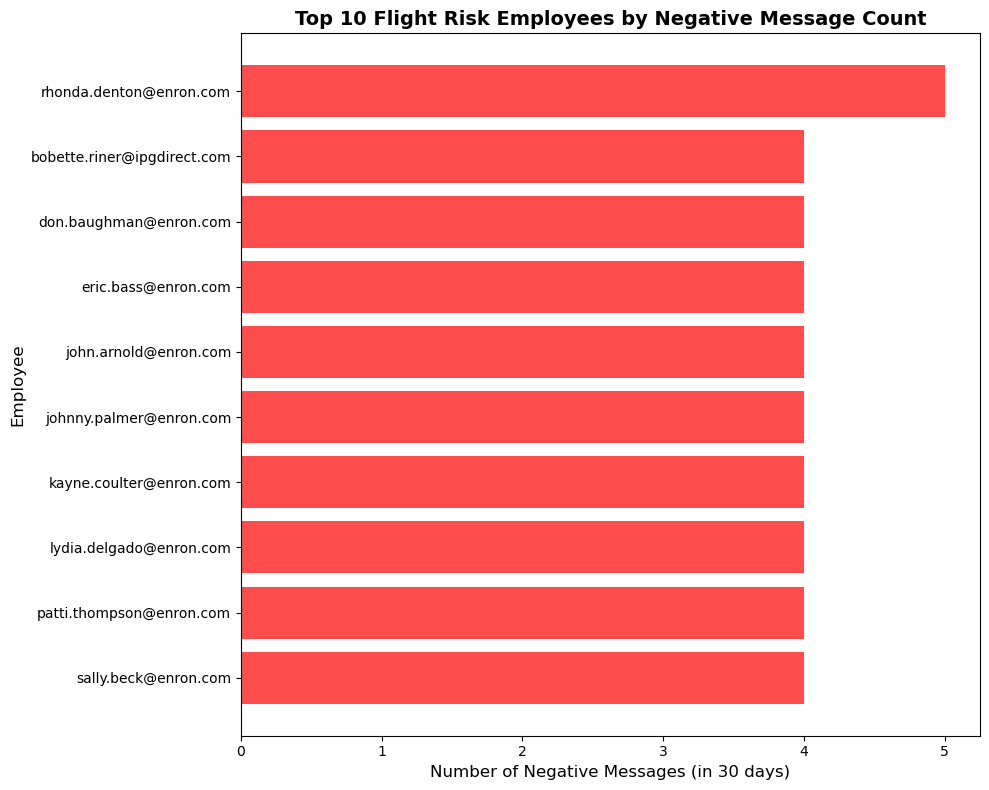

,employee,start_date,end_date,negative_count
0,bobette.riner@ipgdirect.com,2010-01-09,2010-02-08,4
1,don.baughman@enron.com,2009-12-24,2010-01-23,4
2,eric.bass@enron.com,2009-12-11,2010-01-10,4
3,john.arnold@enron.com,2009-12-28,2010-01-27,4
4,johnny.palmer@enron.com,2009-12-20,2010-01-19,4
5,kayne.coulter@enron.com,2009-12-19,2010-01-18,4
6,lydia.delgado@enron.com,2009-12-14,2010-01-13,4
7,patti.thompson@enron.com,2009-12-16,2010-01-15,4
8,rhonda.denton@enron.com,2010-01-24,2010-02-23,5
9,sally.beck@enron.com,2009-12-17,2010-01-16,4


In [52]:
identify_flight_risks(df)

# Task 6: Develop predictive model for sentiment scores

In [61]:
import seaborn as sns
from typing import Dict, Any
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

def prepare_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Aggregates raw data to create features for modeling.
    Derives 'text_length' and 'word_count' from the 'full_text' column.
    """
    print("1. Preparing features for modeling...")
    
    # Derive 'text_length' and 'word_count' from 'full_text' column
    df['text_length'] = df['full_text'].apply(len)
    df['word_count'] = df['full_text'].apply(lambda x: len(x.split()))
    
    # Derive 'month_year' from the 'date' column for aggregation
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['month_year'] = df['date'].dt.to_period('M').astype(str)

    # Group by employee and month to create features for each month
    features_df = df.groupby(['from', 'month_year']).agg(
        avg_text_length=('text_length', 'mean'),
        std_text_length=('text_length', 'std'),
        message_count=('text_length', 'count'),
        avg_word_count=('word_count', 'mean'),
        std_word_count=('word_count', 'std'),
        sentiment_score=('sentiment_score', 'sum')
    ).reset_index()
    
    # Fill NaN in std columns for employees with only one message in a month
    features_df['std_text_length'] = features_df['std_text_length'].fillna(0)
    features_df['std_word_count'] = features_df['std_word_count'].fillna(0)
    
    features_df = features_df.dropna()
    print(f"   Prepared {len(features_df)} samples for modeling.")
    return features_df

def train_and_evaluate(X_train: np.ndarray, y_train: pd.Series, X_test: np.ndarray, y_test: pd.Series) -> Dict[str, Dict[str, Any]]:
    """Trains and evaluates multiple regression models."""
    print("2. Training and evaluating models...")
    
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(alpha=1.0)
    }
    
    results = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {
            "model": model,
            "y_pred": y_pred,
            "mse": mse,
            "r2": r2,
            "coefficients": model.coef_
        }
        print(f"   {name} -> R-squared: {r2:.4f}, MSE: {mse:.4f}")
        
    return results

def plot_model_performance(y_test: pd.Series, y_pred: np.ndarray, feature_importance: pd.DataFrame, model_name: str):
    """Visualizes the performance of a regression model."""
    fig, axes = plt.subplots(2, 2, figsize=(16, 14))
    fig.suptitle(f'Performance Analysis for {model_name}', fontsize=16, fontweight='bold')
    
    ax1 = axes[0, 0]
    ax1.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='k')
    ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit')
    ax1.set_xlabel('Actual Scores', fontsize=12)
    ax1.set_ylabel('Predicted Scores', fontsize=12)
    ax1.set_title('Actual vs. Predicted Scores', fontsize=14)
    ax1.legend()
    ax1.grid(True, linestyle='--', alpha=0.6)
    
    residuals = y_test - y_pred
    ax2 = axes[0, 1]
    ax2.scatter(y_pred, residuals, alpha=0.7, color='green', edgecolors='k')
    ax2.axhline(y=0, color='r', linestyle='--')
    ax2.set_xlabel('Predicted Scores', fontsize=12)
    ax2.set_ylabel('Residuals', fontsize=12)
    ax2.set_title('Residual Plot', fontsize=14)
    ax2.grid(True, linestyle='--', alpha=0.6)
    
    ax3 = axes[1, 0]
    feature_importance.plot(kind='barh', x='feature', y='coefficient', ax=ax3, color='purple', legend=None)
    ax3.set_title('Feature Importance (Coefficients)', fontsize=14)
    ax3.set_xlabel('Coefficient Value', fontsize=12)
    ax3.set_ylabel('Feature', fontsize=12)
    ax3.grid(True, linestyle='--', alpha=0.6)
    
    ax4 = axes[1, 1]
    sns.histplot(residuals, kde=True, ax=ax4, color='orange')
    ax4.set_title('Distribution of Residuals', fontsize=14)
    ax4.set_xlabel('Residuals', fontsize=12)
    ax4.set_ylabel('Frequency', fontsize=12)
    ax4.grid(True, linestyle='--', alpha=0.6)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'visualizations/{model_name.replace(" ", "_").lower()}_performance.png', dpi=300)
    plt.show()

def predictive_modeling_pipeline(df: pd.DataFrame) -> Dict[str, Any]:
    """
    Task 6: Complete pipeline to develop and evaluate predictive models for sentiment scores.
    """
    print("\n--- STARTING PREDICTIVE MODELING PIPELINE ---")
    
    features_df = prepare_features(df)
    
    # Use the appropriate feature columns based on the newly created features
    feature_columns = ['avg_text_length', 'std_text_length', 'message_count', 
                       'avg_word_count', 'std_word_count']

    X = features_df[feature_columns]
    y = features_df['sentiment_score']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model_results = train_and_evaluate(X_train_scaled, y_train, X_test_scaled, y_test)
    
    print("\n3. Visualizing model performance...")
    for name, result in model_results.items():
        feature_importance = pd.DataFrame({
            'feature': feature_columns,
            'coefficient': result['coefficients']
        }).sort_values('coefficient', ascending=False, key=lambda col: col.abs())
        
        plot_model_performance(y_test, result['y_pred'], feature_importance, name)
        
    print("\n--- PREDICTIVE MODELING PIPELINE COMPLETE ---")
    return model_results



--- STARTING PREDICTIVE MODELING PIPELINE ---
1. Preparing features for modeling...
   Prepared 240 samples for modeling.
2. Training and evaluating models...
   Linear Regression -> R-squared: -0.1749, MSE: 7.5060
   Ridge Regression -> R-squared: -0.1510, MSE: 7.3536

3. Visualizing model performance...


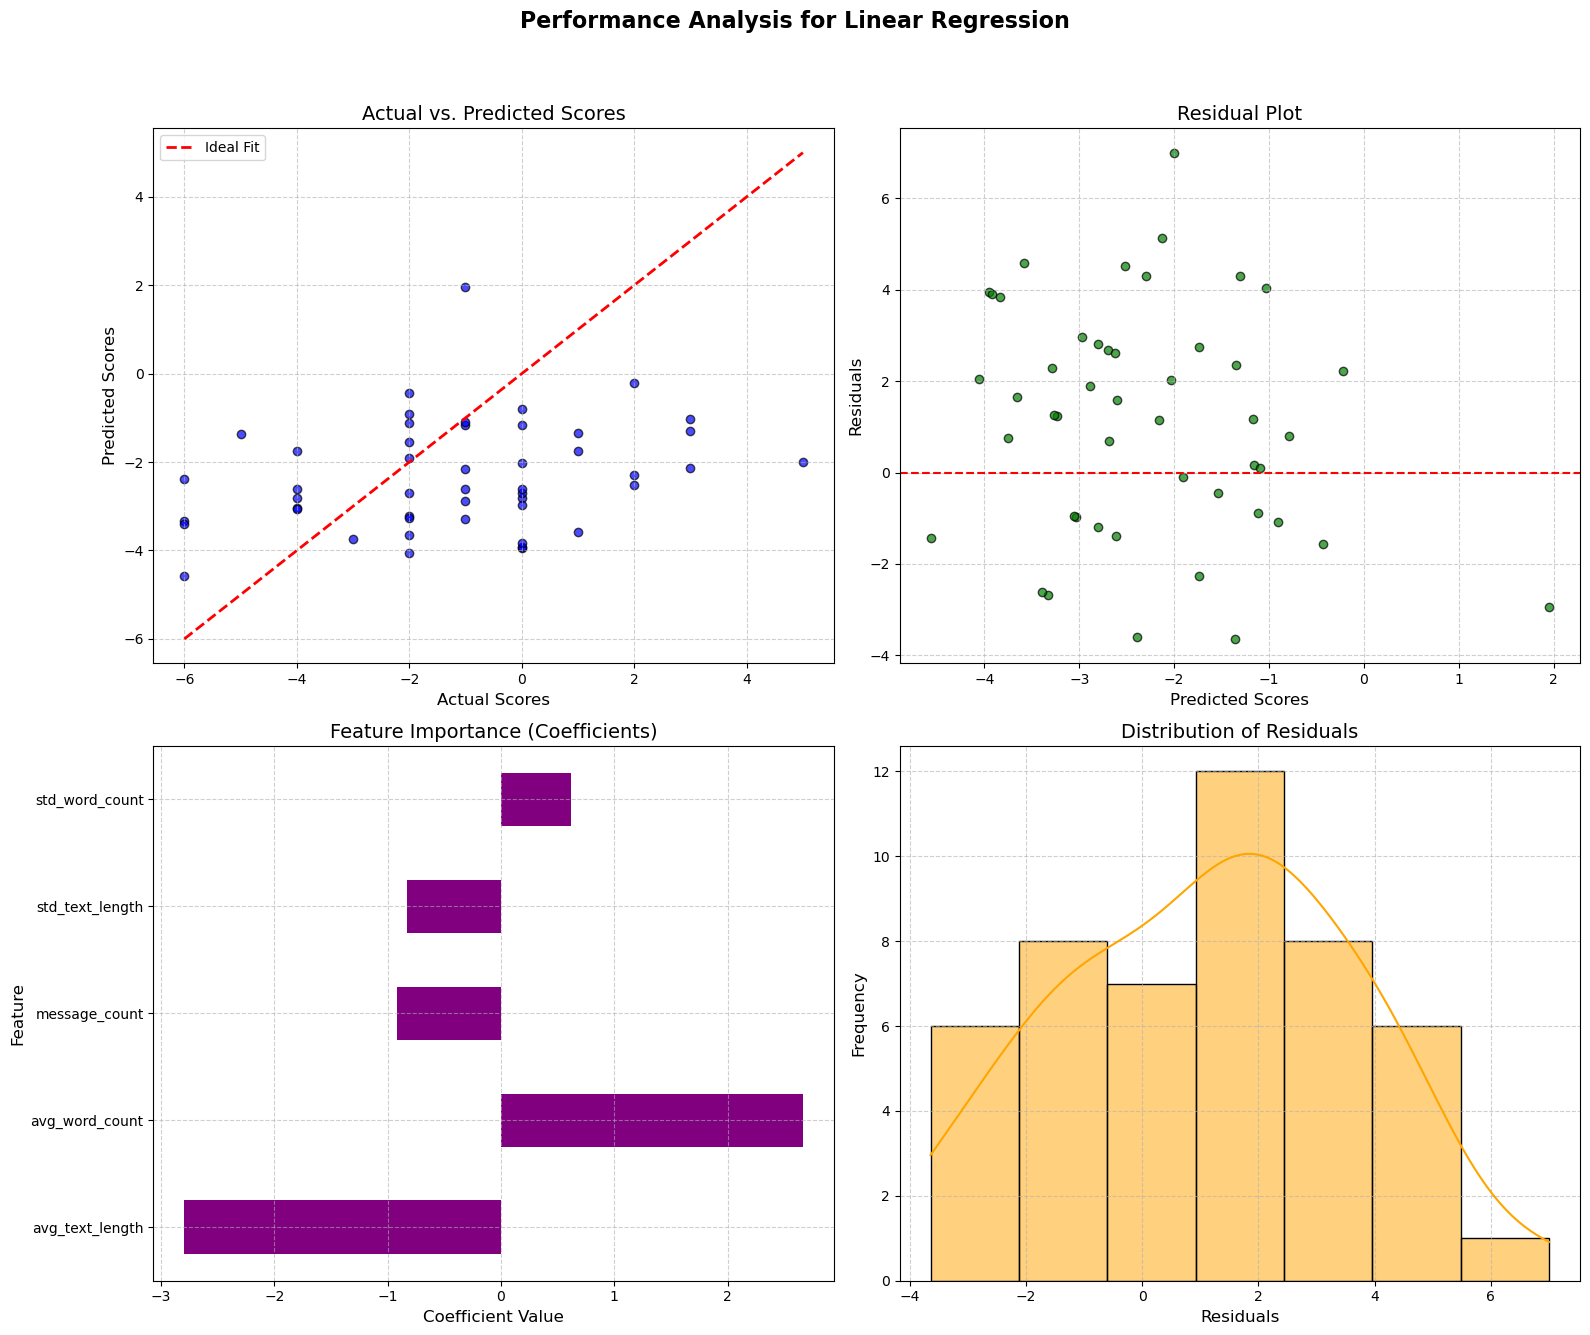

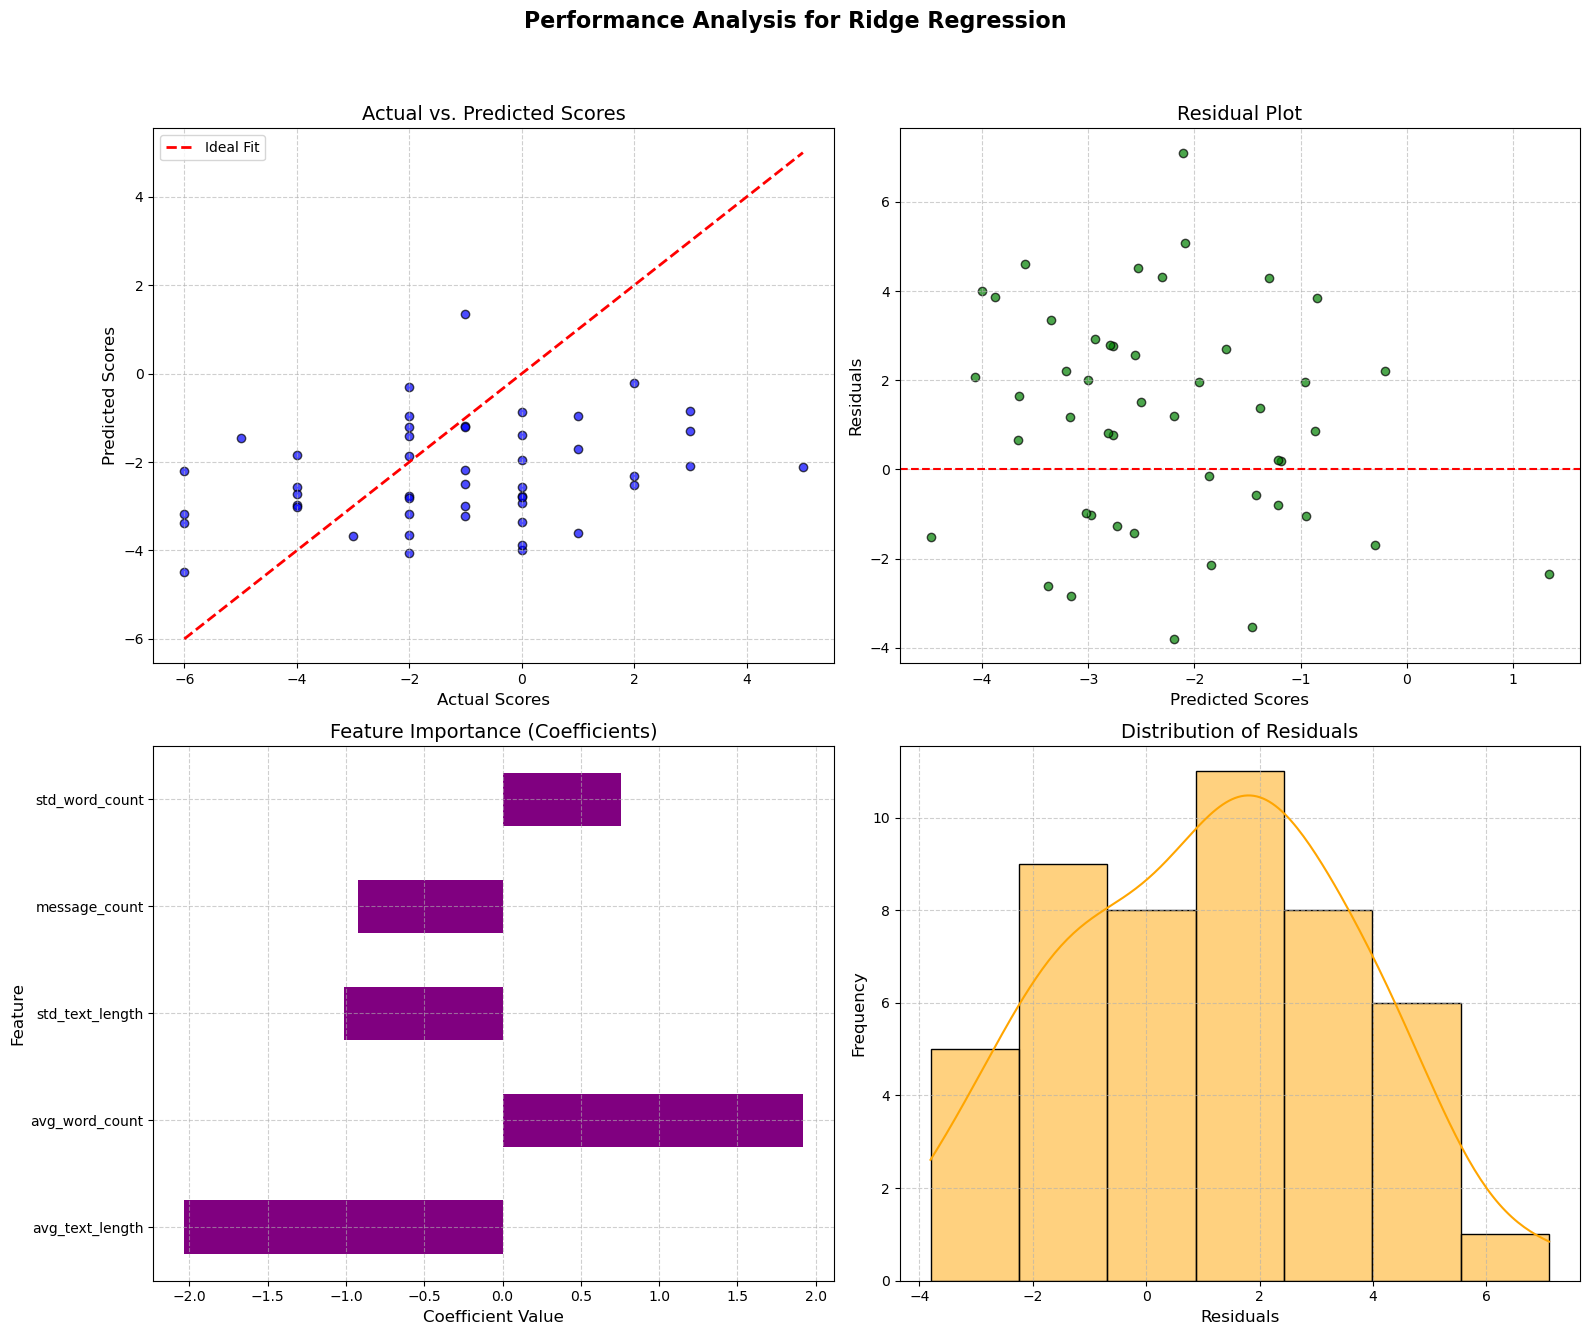


--- PREDICTIVE MODELING PIPELINE COMPLETE ---


In [62]:
final_models = predictive_modeling_pipeline(df)